<a href="https://colab.research.google.com/github/MekhzZ/opencv_bootcamp_exercise/blob/main/Accessing_%26_Writing_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries

import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [ ]:
# downloading assets

def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [ ]:
# read video from source

source = '/content/race_car.mp4'

cap = cv2.VideoCapture(source)

In [ ]:
ret, frame = cap.read()

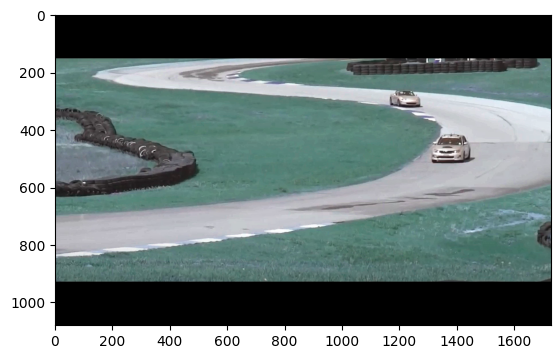

In [ ]:
plt.imshow(frame)

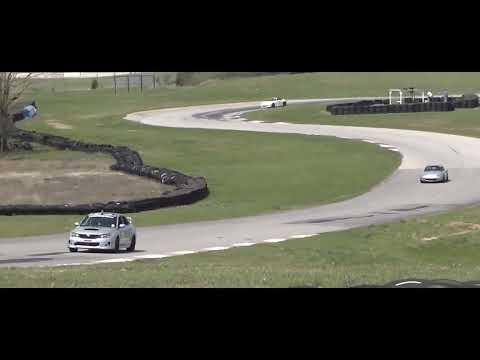

In [ ]:
# displaying the video file

video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)


In [ ]:
# writing a video ussing OpenCV

# videowriter object is needed

# VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# this creates the blank avi file
out_avi = cv2.VideoWriter('race_car_out.avi',fourcc= cv2.VideoWriter_fourcc('M','J','P','G'), fps=10, frameSize= (frame_width, frame_height))

[Click to understand more about fourcc](https://docs.opencv.org/3.4/dd/d9e/classcv_1_1VideoWriter.html)

The fourcc code is a 4-byte code used to specify the video codec.

Here are some common fourcc codes and their corresponding codecs:

* cv2.VideoWriter_fourcc('M', 'J', 'P',
'G'): Motion JPEG codec, often used for .avi files.

* cv2.VideoWriter_fourcc('X', 'V', 'I', 'D'): MPEG-4 codec, often used for .avi files.

* cv2.VideoWriter_fourcc('M', 'P', '4', 'V'): MPEG-4 codec, often used for .mp4 files.

* cv2.VideoWriter_fourcc('X', '2', '6', '4'): MPEG-4 codec, often used for .mp4 files.



In [ ]:
# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)

    # Break the loop
    else:
        break

In [ ]:
# releasing the objects after eth done

cap.release()
out_avi.release()

To display video on Google Colab, we will install and use the ffmpeg package. Using ffmpeg we will change the encoding of the .mp4 file from XVID to H264

HTML 5 can properly render videos with H264 encoding and OpenCV doesn't have that encoding yet. That's why we need to change their encodings such that they can be rendered.

In [ ]:
!apt-get -qq install ffmpeg

In [ ]:
out_mp4 = cv2.VideoWriter('race_car_mp4.mp4', cv2.VideoWriter_fourcc(*'XVID'),10,(frame_width,frame_height))

In [ ]:
cap = cv2.VideoCapture('/content/race_car.mp4')

In [ ]:
while cap.isOpened():
  ret, frame = cap.read()

  if ret:
    out_mp4.write(frame)

  else:
    break

no


In [ ]:
# Change video encoding of mp4 file from XVID to h264
!ffmpeg -y -i "/content/race_car_mp4.mp4" -c:v libx264 "race_car_out_x264.mp4"  -hide_banner -loglevel error

[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5a7e6a1de040] moov atom not found
/content/race_car_mp4.mp4: Invalid data found when processing input


In [ ]:
mp4 = open("/content/race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")

In [ ]:
cap.release()

In [ ]:
out_mp4.release()